In [2207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2208]:
match_data = pd.read_csv("OneDrive/match_level_scorecard.csv")
match_data.drop(columns=['season','team1', 'team2','city','umpire1', 'umpire2', 'series_type','venue','series_name','winner'], axis=1, inplace=True)
match_data.head()

,match id,by,win amount,toss winner,toss decision,match_dt,lighting,ground_id,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,player_of_the_match_id
0,8638034,wickets,9.0,Wn,field,2021-01-01,night match,17681,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,18570,NaN
1,8588005,runs,7.0,Sy Tr,field,2021-01-01,night match,6663,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,33963,1749075.0
2,8587837,wickets,4.0,Sy Ss,bat,2021-01-02,night match,1476,165,8,126,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,33921,3890984.0
3,8638041,wickets,2.0,Oo,field,2021-01-02,night match,17681,153,7,128,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,18360,NaN
4,8587921,runs,21.0,Me Ss,field,2021-01-02,day/night match,6348,164,5,126,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,33928,3125849.0


In [2209]:
df = pd.DataFrame(match_data)
potm = df['player_of_the_match_id']
print(len(potm.unique()))

527


In [2210]:
from sklearn.preprocessing import LabelEncoder
# Instantiate the encoder
label_encoder = LabelEncoder()

# Fit and transform the 'toss decision' column
match_data['toss decision'] = label_encoder.fit_transform(match_data['toss decision'])

# Map 'toss winner' column to the respective team IDs
match_data['toss winner'] = match_data.apply(
    lambda row: row['team1_id'] if row['toss winner'] == row['team1_id'] else row['team2_id'], axis=1)

# Fit and transform the 'toss decision' column
match_data['by'] = label_encoder.fit_transform(match_data['by'])

match_data['lighting'] = label_encoder.fit_transform(match_data['lighting'])
match_data.head(10)

,match id,by,win amount,toss winner,toss decision,match_dt,lighting,ground_id,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,player_of_the_match_id
0,8638034,1,9.0,18570,1,2021-01-01,2,17681,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,18570,NaN
1,8588005,0,7.0,33963,1,2021-01-01,2,6663,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,33963,1749075.0
2,8587837,1,4.0,33921,0,2021-01-02,2,1476,165,8,126,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,33921,3890984.0
3,8638041,1,2.0,18360,1,2021-01-02,2,17681,153,7,128,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,18360,NaN
4,8587921,0,21.0,33949,1,2021-01-02,1,6348,164,5,126,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,33928,3125849.0
5,8638048,1,10.0,17653,1,2021-01-03,0,5081,52,4,33,55.0,0.0,28.0,17583,5764576.0:3069954.0:3935854.0:3913440.0:494977...,17653,4381747.0:2659243.0:3682160.0:4381705.0:383436...,17653,NaN
6,8587907,1,7.0,33956,1,2021-01-03,2,6663,150,4,125,151.0,3.0,108.0,33914,4685568.0:5056134.0:2285051.0:1635773.0:546900...,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33956,7869987.0
7,8587984,0,96.0,33942,1,2021-01-03,0,23841,185,3,124,89.0,10.0,80.0,33935,2089079.0:2827327.0:4635658.0:1626526.0:190716...,33942,5406540.0:46794.0:37351.0:2669316.0:181404.0:2...,33935,4635658.0
8,8638055,1,6.0,17982,1,2021-01-04,2,3541,117,9,124,122.0,4.0,107.0,17744,1945390.0:6487032.0:3083632.0:6496118.0:253780...,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,17982,NaN
9,8588166,0,10.0,33928,1,2021-01-04,1,6348,183,6,122,173.0,6.0,124.0,33949,363047.0:2275097.0:3737103.0:2275195.0:4230127...,33928,4223883.0:2161599.0:1655436.0:319948.0:6249256...,33949,2275097.0


In [2211]:
#top_player = player_of_the_match_id.groupby('batsman_id')['runs'].sum().sort_values(ascending=False).head(10)

In [2212]:
match_data.shape

(1689, 20)

In [2213]:
bowler_data = pd.read_csv("OneDrive/bowler_level_scorecard.csv")
bowler_data.drop(columns=['bowler','bowler_details','match_dt','is_bowler_captain','is_bowler_keeper'],axis=1,inplace=True)
bowler_data.head()

,match id,bowler_id,inning,runs,wicket_count,balls_bowled,economy,maiden,dots,Fours,Sixes,wides,noballs
0,8638034,6718396.0,1,21,0,12,10.50,0,3.0,1,1,3,1
1,8638034,1585464.0,1,34,1,24,8.50,0,7.0,3,1,2,0
2,8638034,2486896.0,1,23,2,24,5.75,0,12.0,1,1,0,0
3,8638034,3083667.0,1,31,1,24,7.75,0,9.0,4,0,2,0
4,8638034,4950294.0,1,21,1,24,5.25,0,8.0,0,0,1,0


In [2214]:
batsman_data = pd.read_csv("OneDrive/batsman_level_scorecard.csv")
batsman_data.drop(columns=['batsman','batsman_details','match_dt','is_batsman_captain','is_batsman_keeper','out_by_fielder','out_by_bowler','is_bowler_captain','is_bowler_keeper'],axis=1,inplace=True)
batsman_data['Fours'].fillna(0, inplace=True)
batsman_data['Sixes'].fillna(0, inplace=True)
batsman_data['wicket kind'] = label_encoder.fit_transform(batsman_data['wicket kind'])
batsman_data['bowler_id'].fillna(0, inplace=True)
batsman_data.head(10)

,match id,batsman_id,inning,runs,balls_faced,over_faced_first,wicket kind,bowler_id,bowler_details,strike_rate,Fours,Sixes
0,8638034,7907451.0,1,7,5,1.1,1,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,140.00,1.0,0.0
1,8638034,4381761.0,1,46,46,1.2,1,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,100.00,4.0,1.0
2,8638034,4949790.0,1,9,10,12.1,1,4950294.0,NZ:Right-hand bat:Legbreak googly:,90.00,0.0,0.0
3,8638034,3834305.0,1,28,22,13.6,1,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,127.27,3.0,0.0
4,8638034,3776849.0,1,18,13,17.2,10,0.0,NaN,138.46,0.0,1.0
5,8638034,6718340.0,1,1,2,20.3,10,0.0,NaN,50.00,0.0,0.0
6,8638034,31464.0,1,8,11,5.1,1,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,72.73,1.0,0.0
7,8638034,258649.0,1,19,12,8.1,1,3083667.0,NED:Right-hand bat:Right-arm medium-fast:,158.33,2.0,1.0
8,8638034,2653993.0,2,13,15,1.1,1,3776849.0,NZ:Right-hand bat:Right-arm fast-medium:,86.67,1.0,0.0
9,8638034,6718326.0,2,91,50,1.2,10,0.0,NaN,182.00,7.0,5.0


In [2215]:
batsman_data.shape

(24483, 12)

In [2216]:
train_data = pd.read_csv("OneDrive/train_data_with_samplefeatures.csv")
train_data.drop(columns=['winner','city','series_name','match_dt','venue','season'],axis=1,inplace=True)

train_data['lighting'] = label_encoder.fit_transform(train_data['lighting'])

#train_data['toss winner'] = match_data.apply(
 #   lambda row: row['team1_id'] if row['toss winner'] == row['team1_id'] else row['team2_id'], axis=1)
#train_data.head()
#label_encoder = LabelEncoder()
#train_data['team1'] = train_data['team1_id']
#train_data['team2'] = train_data['team2_id']
train_data['toss decision'] = label_encoder.fit_transform(train_data['toss decision'])
train_data['toss winner'] = train_data.apply(
    lambda row: row['team1_id'] if row['toss winner'] == row['team1'] else row['team2_id'],
    axis=1
)
train_data.drop(columns=['team1','team2'],axis=1,inplace=True)

train_data.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000


In [2217]:
test_data = pd.read_csv("OneDrive/test_data_with_samplefeatures.csv")
test_data.drop(columns=['team1','team2','team1_roster_ids','team2_roster_ids','city','match_dt','series_name','venue','season'],axis=1,inplace=True)
test_data['lighting'] = label_encoder.fit_transform(test_data['lighting'])

test_data['toss winner'] = test_data.apply(
    lambda row: row['team1_id'] if row['toss winner'] == row['team1_id'] else row['team2_id'], axis=1)

label_encoder = LabelEncoder()

test_data['toss decision'] = label_encoder.fit_transform(test_data['toss decision'])
test_data.head()

,match id,team1_id,team2_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,28594,90,90,1,0,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,36084,36098,36098,1,2,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,30428,48334,48334,0,2,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,36098,36112,36112,1,2,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,30414,48341,48341,1,2,18752,2.375000,0.310330,169.933333,0.00,164.125


In [2218]:
print(match_data.isnull().sum())

match id                    0
by                          0
win amount                  0
toss winner                 0
toss decision               0
match_dt                    0
lighting                    0
ground_id                   0
inning1_runs                0
inning1_wickets             0
inning1_balls               0
inning2_runs                0
inning2_wickets             0
inning2_balls               0
team1_id                    0
team1_roster_ids            0
team2_id                    0
team2_roster_ids            0
winner_id                   0
player_of_the_match_id    514
dtype: int64


In [2219]:
print(bowler_data.isnull().sum())

match id        0
bowler_id       0
inning          0
runs            0
wicket_count    0
balls_bowled    0
economy         0
maiden          0
dots            0
Fours           0
Sixes           0
wides           0
noballs         0
dtype: int64


In [2220]:
print(batsman_data.isnull().sum())

match id               0
batsman_id             0
inning                 0
runs                   0
balls_faced            0
over_faced_first       0
wicket kind            0
bowler_id              0
bowler_details      6355
strike_rate            9
Fours                  0
Sixes                  0
dtype: int64


In [2221]:
print(train_data.isnull().sum())
train_data.shape

match id                      0
team1_id                      0
team1_roster_ids              0
team2_id                      0
team2_roster_ids              0
winner_id                     0
toss winner                   0
toss decision                 0
lighting                      0
ground_id                     0
team_count_50runs_last15      0
team_winp_last5               0
team1only_avg_runs_last15    21
team1_winp_team2_last15       0
ground_avg_runs_last15       53
dtype: int64


(948, 15)

In [2222]:
print(test_data.isnull().sum())

match id                      0
team1_id                      0
team2_id                      0
toss winner                   0
toss decision                 0
lighting                      0
ground_id                     0
team_count_50runs_last15      0
team_winp_last5               0
team1only_avg_runs_last15     7
team1_winp_team2_last15       0
ground_avg_runs_last15       10
dtype: int64


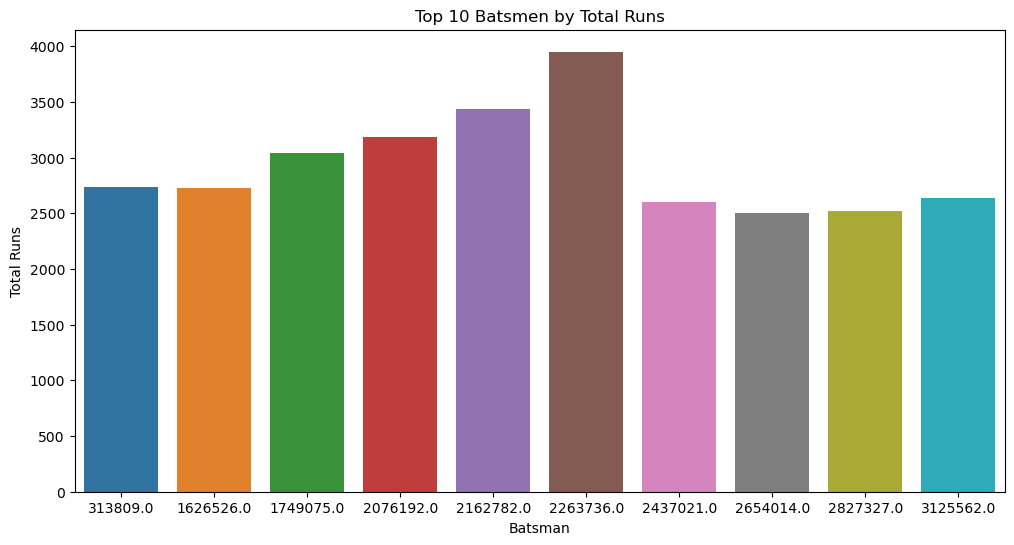

In [2223]:
top_batsmen = batsman_data.groupby('batsman_id')['runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values)
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()

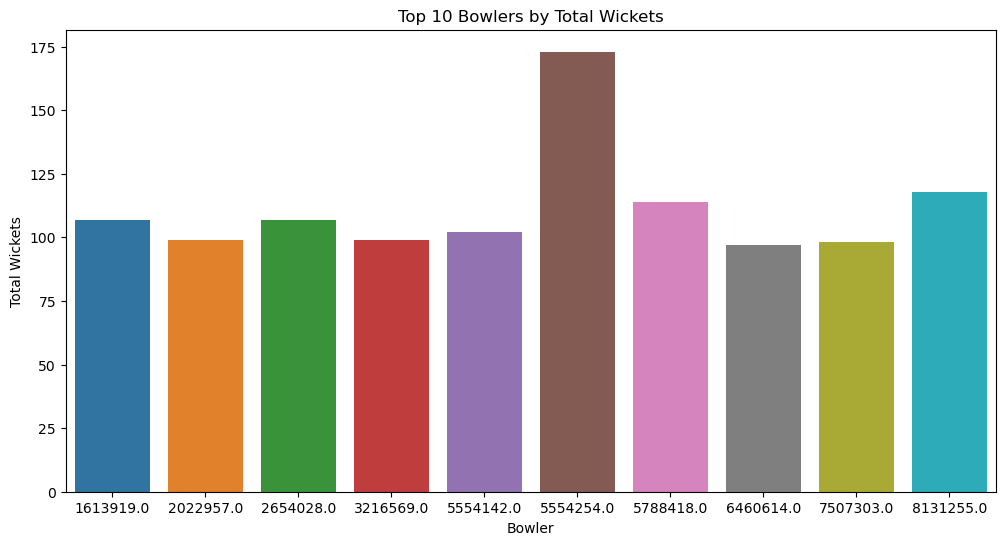

In [2224]:
top_bowlers = bowler_data.groupby('bowler_id')['wicket_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values)
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.show()

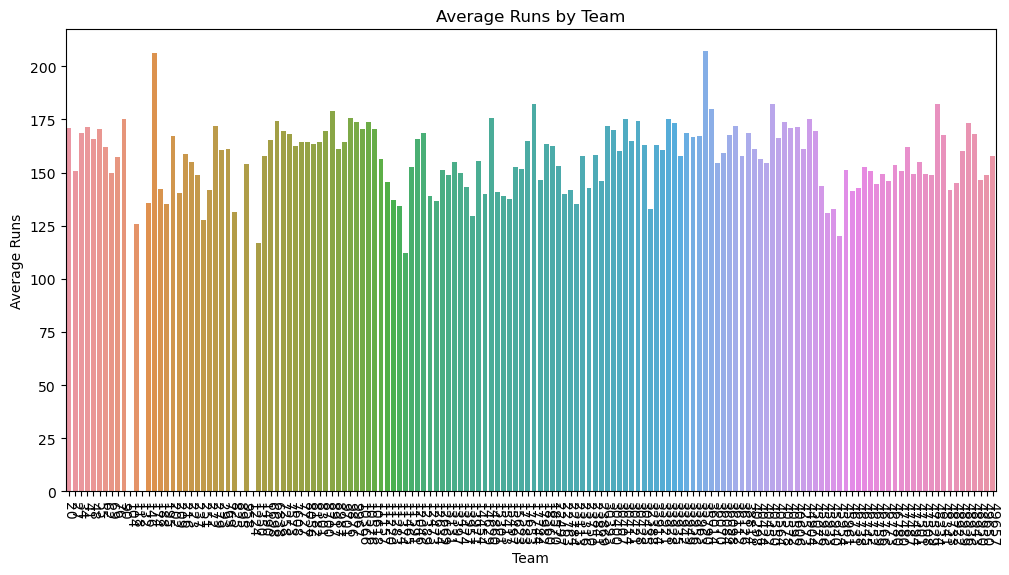

In [2225]:
avg_runs_team = train_data.groupby('team1_id')['team1only_avg_runs_last15'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_runs_team.index, y=avg_runs_team.values)
plt.title('Average Runs by Team')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=-90)
plt.show()

In [2226]:
df = pd.DataFrame(train_data)
team1 = df['team1_id']
team2 = df['team2_id']
all_teams = pd.concat([team1, team2])

unique_teams = all_teams.unique()

total_teams = len(unique_teams)
print(len(unique_teams))

162


In [2227]:
train_data.shape
train_data.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000


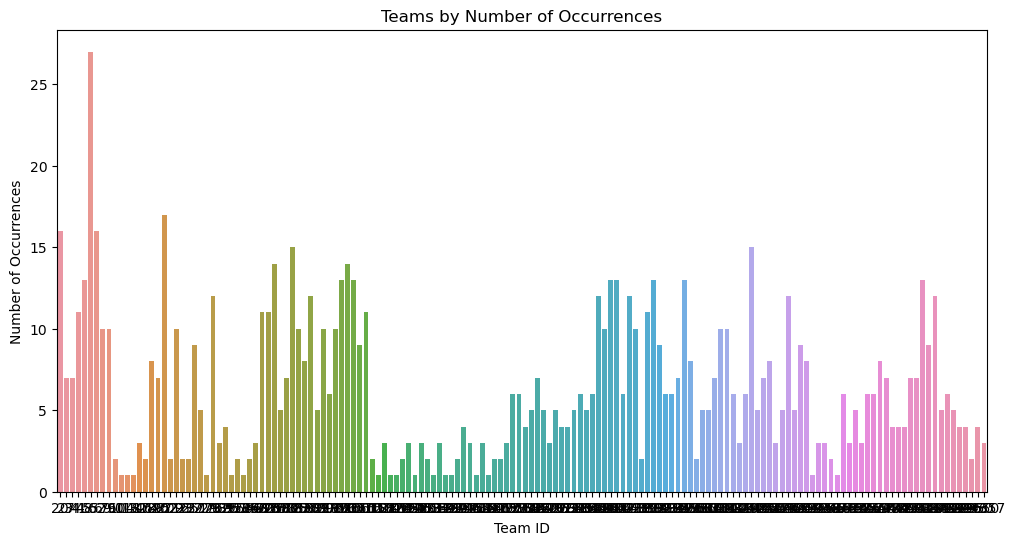

In [2228]:

# Extract the 'team1_id' column and create a DataFrame
data1 = train_data['team1_id']
data2 = train_data['team2_id']
pd.concat([data1,data2],ignore_index = True)
df = pd.DataFrame(data1)

# Calculate value counts
value_counts = df['team1_id'].value_counts()

# Convert value counts to a DataFrame and rename columns
counts_df = value_counts.reset_index()
counts_df.columns = ['team_id', 'count']

# Select the top 10 teams
top_teams = counts_df.head(162)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_teams['team_id'], y=top_teams['count'])
plt.xlabel('Team ID')
plt.ylabel('Number of Occurrences')
plt.title('Teams by Number of Occurrences')
plt.show()



In [2229]:
df = pd.DataFrame(train_data)
grounds = df['ground_id']
num = grounds.unique()
print(len(num))

123


In [2230]:
train_data.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000


In [2231]:
match_data.groupby(['ground_id']).count()['inning1_runs']

ground_id
83       19
251      29
328      26
342      18
440      25
538      23
664      19
769      10
783       2
797      15
825      13
930      23
937      17
1042     19
1161     38
1224     24
1231      4
1245     15
1266     25
1378     21
1406     11
1469      4
1476     15
1511      2
1525     13
1637     18
1658      2
1672      7
1833     14
1840      5
1994      4
2050     15
2057     20
2127     22
2190     10
2239     17
2344     26
2764     12
2932      1
3128      2
3135      6
3184      4
3226      4
3422     36
3541      7
3569      9
3618      5
3702      8
3828     27
3961      7
4045     41
4304      2
4416      1
4521     25
4661     17
4794      4
4815      4
4913     11
5004     39
5081     11
5312     13
5382      1
5396      9
5893     24
5949     24
6327      9
6348     15
6579      1
6663      6
6831      4
6950      8
7020      7
7041     46
7118     12
7230      3
7286     17
7307      3
7398     18
7475      1
7930      6
8175      3
8252     19
8301  

In [2232]:
match_data[match_data['ground_id'] == 7041].groupby(match_data['ground_id'] == 7041)['inning1_runs'].mean()

ground_id
True    144.891304
Name: inning1_runs, dtype: float64

In [2233]:
# Calculate average runs scored in each ground
match_data['total_runs'] = (match_data['inning1_runs'] + match_data['inning2_runs'])*0.5
ground_avg_runs = match_data.groupby('ground_id')['total_runs'].mean().reset_index()
ground_avg_runs.columns = ['ground_id', 'avg_runs']

print(ground_avg_runs)


     ground_id    avg_runs
0           83  148.026316
1          251  155.448276
2          328  152.653846
3          342  163.222222
4          440  153.860000
5          538  151.521739
6          664  153.973684
7          769  167.650000
8          783  171.750000
9          797  167.900000
10         825  153.230769
11         930  157.760870
12         937  149.500000
13        1042  170.263158
14        1161  151.578947
15        1224  145.041667
16        1231  143.250000
17        1245  159.766667
18        1266  171.160000
19        1378  160.333333
20        1406  161.181818
21        1469  157.875000
22        1476  163.300000
23        1511  140.000000
24        1525  163.884615
25        1637  170.000000
26        1658  179.500000
27        1672  161.642857
28        1833  144.964286
29        1840  134.500000
30        1994  145.125000
31        2050  157.933333
32        2057  168.325000
33        2127  144.409091
34        2190  139.400000
35        2239  160.647059
3

In [2234]:
# Merge the average runs data into the main dataframe
train_data = train_data.merge(ground_avg_runs, on='ground_id', how='left')
# Replace the null values
train_data['ground_avg_runs_last15'].fillna(train_data['avg_runs'], inplace=True)

# Drop the avg_runs column as it is no longer needed
train_data.drop(columns=['avg_runs'], inplace=True)

train_data.head(20)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.00,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.00,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.00,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.00,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.00,189.000000
5,9457412,42573,393371.0:1594347.0:9470873.0:7960847.0:4403426...,40424,7864009.0:4502392.0:6551978.0:2820957.0:280412...,40424,40424,1,2,14188,1.000000,1.000000,158.444444,50.00,147.933333
6,9292548,27,7537004.0:37351.0:1870357.0:2275195.0:4635658....,55,2954769.0:238727.0:1776627.0:3125562.0:4377610...,55,55,1,2,13880,0.700000,1.487805,141.400000,50.00,181.625000
7,9271758,47501,6818622.0:5490596.0:6551978.0:4403545.0:298612...,47494,6517118.0:4403531.0:4932864.0:2214792.0:752034...,47501,47501,0,0,7041,0.909091,1.487805,156.153846,40.00,129.933333
8,9331048,12634,3500958.0:4231751.0:2735081.0:3698337.0:505819...,14860,9098571.0:227793.0:5977026.0:8442244.0:1663885...,12634,14860,1,1,7398,0.272727,0.506173,138.500000,0.00,157.692308
9,9123162,216,2124002.0:2123974.0:7695666.0:6729862.0:649641...,55,3479860.0:5043310.0:3125562.0:4377610.0:210328...,55,55,1,0,6831,0.347826,0.506173,154.266667,0.00,148.500000


In [2235]:
row_index = df.loc[df['ground_id'] == 13880].index
row_index


Int64Index([6, 128, 260, 438], dtype='int64')

In [2236]:
train_data.iloc[6]

match id                                                               9292548
team1_id                                                                    27
team1_roster_ids             7537004.0:37351.0:1870357.0:2275195.0:4635658....
team2_id                                                                    55
team2_roster_ids             2954769.0:238727.0:1776627.0:3125562.0:4377610...
winner_id                                                                   55
toss winner                                                                 55
toss decision                                                                1
lighting                                                                     2
ground_id                                                                13880
team_count_50runs_last15                                                   0.7
team_winp_last5                                                       1.487805
team1only_avg_runs_last15                           

In [2237]:
# Step 1: Determine which innings team1 played in and calculate the average runs
def calculate_avg_runs_last15(df):
    df = df.sort_values('match id', ascending=False).head(15)
    df['team1_inning_runs'] = np.where(df['team1_id'] == df['toss winner'], 
                                       np.where(df['toss decision'] == 1, df['inning1_runs'], df['inning2_runs']),
                                       np.where(df['toss decision'] == 1, df['inning2_runs'], df['inning1_runs']))
    return df['team1_inning_runs'].mean()

team_avg_runs = (
    match_data
    .groupby('team1_id')
    .apply(calculate_avg_runs_last15)
    .reset_index(name='avg_runs_last15')
)

# Step 2: Fill the null values in the train_data team1only_avg_runs_last15 column with these calculated averages
train_data = train_data.merge(team_avg_runs, how='left', left_on='team1_id', right_on='team1_id')
train_data['team1only_avg_runs_last15'].fillna(train_data['avg_runs_last15'], inplace=True)
train_data.drop(columns=['avg_runs_last15'], inplace=True)

train_data.head()


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000


In [2238]:
import pandas as pd

def calculate_avg_runs_on_ground(match_data, data_to_update, team_col='team', ground_col='ground_id', runs_col1='inning1_runs', runs_col2='inning2_runs', winner_col='winner_id'):
    # Step 1: Extract relevant columns and create a new DataFrame for average runs calculation
    avg_runs_data = match_data[[team_col + '1_id', team_col + '2_id', winner_col, ground_col, runs_col1, runs_col2]].copy()

    # Step 2: Initialize dictionaries to store average runs by team and ground
    team1_avg_runs = {}
    team2_avg_runs = {}

    # Step 3: Calculate average runs for team1 and team2 on each ground
    for index, row in avg_runs_data.iterrows():
        ground_id = row[ground_col]
        team1_id = row[team_col + '1_id']
        team2_id = row[team_col + '2_id']
        inning1_runs = row[runs_col1]
        inning2_runs = row[runs_col2]

        if row[winner_col] == team1_id:
            if ground_id not in team1_avg_runs:
                team1_avg_runs[ground_id] = []
            team1_avg_runs[ground_id].append(inning1_runs)

            if ground_id not in team2_avg_runs:
                team2_avg_runs[ground_id] = []
            team2_avg_runs[ground_id].append(inning2_runs)

        elif row[winner_col] == team2_id:
            if ground_id not in team1_avg_runs:
                team1_avg_runs[ground_id] = []
            team1_avg_runs[ground_id].append(inning2_runs)

            if ground_id not in team2_avg_runs:
                team2_avg_runs[ground_id] = []
            team2_avg_runs[ground_id].append(inning1_runs)

    # Step 4: Calculate average runs for each team on each ground
    team1_avg_runs_final = {ground_id: sum(runs) / len(runs) for ground_id, runs in team1_avg_runs.items()}
    team2_avg_runs_final = {ground_id: sum(runs) / len(runs) for ground_id, runs in team2_avg_runs.items()}

    # Step 5: Merge the average runs data with data_to_update
    data_to_update[team_col + '1_avg_runs_on_' + ground_col] = data_to_update[ground_col].map(team1_avg_runs_final)
    data_to_update[team_col + '2_avg_runs_on_' + ground_col] = data_to_update[ground_col].map(team2_avg_runs_final)

    return data_to_update


In [2239]:
# Example call for train_data
train_data = calculate_avg_runs_on_ground(match_data, train_data, team_col='team', ground_col='ground_id', runs_col1='inning1_runs', runs_col2='inning2_runs', winner_col='winner_id')

# Display the updated DataFrame
train_data.head()


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571,158.777778,142.388889
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000,178.636364,143.727273
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333,164.344828,146.551724
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000,158.111111,140.888889
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000,179.000000,164.916667


In [2240]:
train_data.shape

(948, 17)

In [2241]:
def add_avg_strike_rate_ratio_feature(match_data, batsman_data, dataset):
    # Step 1: Parse the roster IDs into individual player IDs for both team1 and team2
    match_data['team1_roster_list'] = match_data['team1_roster_ids'].str.split(':')
    match_data['team2_roster_list'] = match_data['team2_roster_ids'].str.split(':')

    # Step 2: Function to calculate average strike rate for a team
    def calculate_team_strike_rate(roster_list, batsman_data):
        strike_rates = []
        for player_id in roster_list:
            try:
                player_id = float(player_id)  # Convert to float if necessary
                if player_id in batsman_data['batsman_id'].values:
                    strike_rate = batsman_data[batsman_data['batsman_id'] == player_id]['strike_rate'].values[0]
                    strike_rates.append(strike_rate)
            except ValueError:
                print(f"Invalid player ID: {player_id}")
        
        if len(strike_rates) > 0:
            return sum(strike_rates) / len(strike_rates)
        else:
            return 0  # Return 0 if no batsmen are found

    # Step 3: Calculate average strike rate for each team
    teams = pd.concat([match_data['team1_id'], match_data['team2_id']]).unique()
    team_avg_strike_rates = {}
    for team_id in teams:
        team_matches = match_data[(match_data['team1_id'] == team_id) | (match_data['team2_id'] == team_id)]
        team_roster = team_matches.apply(lambda x: x['team1_roster_list'] if x['team1_id'] == team_id else x['team2_roster_list'], axis=1)
        team_strike_rates = team_roster.apply(lambda x: calculate_team_strike_rate(x, batsman_data))
        team_avg_strike_rates[team_id] = team_strike_rates.mean()

    # Step 4: Calculate the ratio of average strike rates for each match in dataset
    dataset['team1_avg_strike_rate'] = dataset['team1_id'].map(team_avg_strike_rates)
    dataset['team2_avg_strike_rate'] = dataset['team2_id'].map(team_avg_strike_rates)
    dataset['avg_strike_rate_ratio'] = dataset.apply(
        lambda row: row['team1_avg_strike_rate'] / row['team2_avg_strike_rate'] if row['team2_avg_strike_rate'] != 0 else 1,
        axis=1
    )

    dataset.drop(columns=['team1_avg_strike_rate', 'team2_avg_strike_rate'], inplace=True)

    return dataset


In [2242]:

# Example usage:
# Assuming match_data, batsman_data, and train_data are already defined
train_data = add_avg_strike_rate_ratio_feature(match_data, batsman_data, train_data)
# Display the updated train_data DataFrame with the new column
train_data.head()


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571,158.777778,142.388889,1.471067
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000,178.636364,143.727273,0.815010
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333,164.344828,146.551724,0.701126
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000,158.111111,140.888889,0.949770
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000,179.000000,164.916667,1.274051


In [2243]:
import pandas as pd

def calculate_economy_ratio(match_data, bowler_data, test_data):
    # Step 1: Parse the roster IDs into individual player IDs for both team1 and team2
    match_data['team1_roster_list'] = match_data['team1_roster_ids'].str.split(':')
    match_data['team2_roster_list'] = match_data['team2_roster_ids'].str.split(':')
    
    # Step 2: Function to calculate average economy for a team
    def calculate_team_economy(roster_list, bowler_data):
        economies = []
        for player_id in roster_list:
            player_id = float(player_id)  # Convert to float if necessary
            if player_id in bowler_data['bowler_id'].values:
                economy = bowler_data[bowler_data['bowler_id'] == player_id]['economy'].values[0]
                economies.append(economy)
        
        if len(economies) > 0:
            return sum(economies) / len(economies)
        else:
            return None
    
    # Step 3: Calculate average economy for team1 and team2 in match_data
    teams = pd.concat([match_data['team1_id'], match_data['team2_id']]).unique()
    team_avg_economy = {}
    for team_id in teams:
        team_matches = match_data[(match_data['team1_id'] == team_id) | (match_data['team2_id'] == team_id)]
        team_roster = team_matches.apply(lambda x: x['team1_roster_list'] if x['team1_id'] == team_id else x['team2_roster_list'], axis=1)
        team_economies = team_roster.apply(lambda x: calculate_team_economy(x, bowler_data))
        team_avg_economy[team_id] = team_economies.mean()

    # Step 4: Calculate the ratio of average economies for each match in test_data
    test_data['team1_avg_economy'] = test_data['team1_id'].map(team_avg_economy)
    test_data['team2_avg_economy'] = test_data['team2_id'].map(team_avg_economy)
    test_data['avg_economy_ratio'] = test_data.apply(
        lambda row: row['team1_avg_economy'] / row['team2_avg_economy'] if row['team2_avg_economy'] and row['team1_avg_economy'] else 0,
        axis=1
    )
    
    test_data.drop(columns=['team1_avg_economy', 'team2_avg_economy'], inplace=True)

    return test_data


In [2244]:
train_data = calculate_economy_ratio(match_data, bowler_data, train_data)
train_data.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio,avg_economy_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571,158.777778,142.388889,1.471067,1.164495
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000,178.636364,143.727273,0.815010,1.075456
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333,164.344828,146.551724,0.701126,0.880298
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000,158.111111,140.888889,0.949770,1.043904
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000,179.000000,164.916667,1.274051,1.150537


In [2245]:
train_data.shape

(948, 19)

In [2246]:
import pandas as pd

def add_ratio_avg_dots_feature(match_data, bowler_data, dataset):
    # Step 1: Parse the roster IDs into individual player IDs for both team1 and team2
    match_data['team1_roster_list'] = match_data['team1_roster_ids'].str.split(':')
    match_data['team2_roster_list'] = match_data['team2_roster_ids'].str.split(':')

    # Step 2: Function to calculate average dot balls for a team
    def calculate_team_dots(roster_list, bowler_data):
        dotballs = []
        for player_id in roster_list:
            try:
                player_id = float(player_id)  # Convert to float if necessary
                if player_id in bowler_data['bowler_id'].values:
                    dots = bowler_data[bowler_data['bowler_id'] == player_id]['dots'].values[0]
                    dotballs.append(dots)
            except ValueError:
                print(f"Invalid player ID: {player_id}")
        
        if len(dotballs) > 0:
            return sum(dotballs) / len(dotballs)
        else:
            return 0  # Return 0 if no bowlers are found

    # Step 3: Calculate average dot balls for each team
    teams = pd.concat([match_data['team1_id'], match_data['team2_id']]).unique()
    team_avg_dots = {}
    for team_id in teams:
        team_matches = match_data[(match_data['team1_id'] == team_id) | (match_data['team2_id'] == team_id)]
        team_roster = team_matches.apply(lambda x: x['team1_roster_list'] if x['team1_id'] == team_id else x['team2_roster_list'], axis=1)
        team_dotballs = team_roster.apply(lambda x: calculate_team_dots(x, bowler_data))
        team_avg_dots[team_id] = team_dotballs.mean()

    # Step 4: Calculate the ratio of average dot balls for each match in the dataset
    dataset['team1_avg_dots'] = dataset['team1_id'].map(team_avg_dots)
    dataset['team2_avg_dots'] = dataset['team2_id'].map(team_avg_dots)
    dataset['ratio_avg_dots'] = dataset.apply(
        lambda row: row['team1_avg_dots'] / row['team2_avg_dots'] if row['team2_avg_dots'] != 0 else 1,
        axis=1
    )

    # Adding team1_avg_dots/team2_avg_dots column
    dataset['ratio_avg_dots'] = dataset['team1_avg_dots'] / dataset['team2_avg_dots']
    
    dataset.drop(columns=['team1_avg_dots', 'team2_avg_dots'], inplace=True)
    return dataset


In [2247]:
# Assuming match_data, bowler_data, and train_data are already defined
train_data = add_ratio_avg_dots_feature(match_data, bowler_data, train_data)
# Display the updated train_data DataFrame with the new column
train_data.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio,avg_economy_ratio,ratio_avg_dots
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,1.666667,0.672131,139.000000,100.0,157.178571,158.777778,142.388889,1.471067,1.164495,0.671579
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,1.285714,1.952381,156.000000,50.0,103.500000,178.636364,143.727273,0.815010,1.075456,1.084104
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,0.857143,0.672131,173.266667,0.0,154.333333,164.344828,146.551724,0.701126,0.880298,0.776319
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,2.166667,1.975610,164.266667,50.0,144.250000,158.111111,140.888889,0.949770,1.043904,0.738108
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,0.818182,1.327869,164.666667,0.0,189.000000,179.000000,164.916667,1.274051,1.150537,0.756286


In [2248]:
import pandas as pd

def calculate_wicket_ratio(match_data, bowler_data, data):
    # Step 1: Parse the roster IDs into individual player IDs for both team1 and team2
    match_data['team1_roster_list'] = match_data['team1_roster_ids'].str.split(':')
    match_data['team2_roster_list'] = match_data['team2_roster_ids'].str.split(':')
    
    # Step 2: Function to calculate average wickets for a team
    def calculate_team_wicket(roster_list, bowler_data):
        wickets = []
        for player_id in roster_list:
            player_id = float(player_id)  # Convert to float if necessary
            if player_id in bowler_data['bowler_id'].values:
                wicket = bowler_data[bowler_data['bowler_id'] == player_id]['wicket_count'].values[0]
                wickets.append(wicket)
        
        if len(wickets) > 0:
            return sum(wickets) / len(wickets)
        else:
            return None
    
    # Step 3: Calculate average wickets for each team
    teams = pd.concat([match_data['team1_id'], match_data['team2_id']]).unique()
    team_avg_wickets = {}
    for team_id in teams:
        team_matches = match_data[(match_data['team1_id'] == team_id) | (match_data['team2_id'] == team_id)]
        team_roster = team_matches.apply(lambda x: x['team1_roster_list'] if x['team1_id'] == team_id else x['team2_roster_list'], axis=1)
        team_wickets = team_roster.apply(lambda x: calculate_team_wicket(x, bowler_data))
        team_avg_wickets[team_id] = team_wickets.mean()

    # Step 4: Calculate the ratio of average wickets for each match in data
    data['team1_avg_wickets'] = data['team1_id'].map(team_avg_wickets)
    data['team2_avg_wickets'] = data['team2_id'].map(team_avg_wickets)
    data['avg_wicket_ratio'] = data.apply(
        lambda row: row['team1_avg_wickets'] / row['team2_avg_wickets'] if row['team2_avg_wickets'] and row['team1_avg_wickets'] else 0,
        axis=1
    )
    
    data.drop(columns=['team1_avg_wickets', 'team2_avg_wickets'], inplace=True)
    return data


In [2249]:
# Example usage:
# Assuming match_data, bowler_data, train_data, and test_data are defined elsewhere
train_data = calculate_wicket_ratio(match_data, bowler_data, train_data)

train_data.head()


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,...,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio,avg_economy_ratio,ratio_avg_dots,avg_wicket_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,...,0.672131,139.000000,100.0,157.178571,158.777778,142.388889,1.471067,1.164495,0.671579,0.249610
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,...,1.952381,156.000000,50.0,103.500000,178.636364,143.727273,0.815010,1.075456,1.084104,1.150107
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,...,0.672131,173.266667,0.0,154.333333,164.344828,146.551724,0.701126,0.880298,0.776319,0.542691
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,...,1.975610,164.266667,50.0,144.250000,158.111111,140.888889,0.949770,1.043904,0.738108,0.558212
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,...,1.327869,164.666667,0.0,189.000000,179.000000,164.916667,1.274051,1.150537,0.756286,1.014726


In [2250]:
import pandas as pd

def add_avg_four_ratio_feature(match_data, batsman_data, dataset):
    # Step 1: Parse the roster IDs into individual player IDs for both team1 and team2
    match_data['team1_roster_list'] = match_data['team1_roster_ids'].str.split(':')
    match_data['team2_roster_list'] = match_data['team2_roster_ids'].str.split(':')

    # Step 2: Function to calculate total fours for a team in a match
    def calculate_team_fours(roster_list, batsman_data):
        total_fours = 0
        for player_id in roster_list:
            player_id = float(player_id)  # Convert to float if necessary
            if player_id in batsman_data['batsman_id'].values:
                fours = batsman_data[batsman_data['batsman_id'] == player_id]['Fours'].values[0]
                total_fours += fours
        return total_fours

    # Step 3: Calculate total fours for team1 and team2 in each match
    match_data['team1_total_fours'] = match_data['team1_roster_list'].apply(calculate_team_fours, args=(batsman_data,))
    match_data['team2_total_fours'] = match_data['team2_roster_list'].apply(calculate_team_fours, args=(batsman_data,))

    # Step 4: Calculate average fours per match for each team
    teams = pd.concat([match_data['team1_id'], match_data['team2_id']]).unique()
    team_avg_fours = {}
    for team_id in teams:
        team_matches = match_data[(match_data['team1_id'] == team_id) | (match_data['team2_id'] == team_id)]
        total_fours = team_matches.apply(
            lambda x: x['team1_total_fours'] if x['team1_id'] == team_id else x['team2_total_fours'], axis=1
        )
        team_avg_fours[team_id] = total_fours.mean()

    # Step 5: Map the average fours to the dataset
    dataset['team1_avg_fours'] = dataset['team1_id'].map(team_avg_fours)
    dataset['team2_avg_fours'] = dataset['team2_id'].map(team_avg_fours)

    # Step 6: Calculate the ratio of average fours for team1 and team2
    dataset['avg_four_ratio'] = dataset.apply(
        lambda row: row['team1_avg_fours'] / row['team2_avg_fours'] if row['team2_avg_fours'] != 0 else 1,
        axis=1
    )

    # Step 7: Drop the intermediate columns
    dataset.drop(columns=['team1_avg_fours', 'team2_avg_fours'], inplace=True)

    return dataset


In [2251]:
# Assuming match_data, batsman_data, and train_data are already defined
train_data = add_avg_four_ratio_feature(match_data, batsman_data, train_data)
# Display the updated train_data DataFrame with the new column
train_data.head()


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,...,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio,avg_economy_ratio,ratio_avg_dots,avg_wicket_ratio,avg_four_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,...,139.000000,100.0,157.178571,158.777778,142.388889,1.471067,1.164495,0.671579,0.249610,3.309326
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,...,156.000000,50.0,103.500000,178.636364,143.727273,0.815010,1.075456,1.084104,1.150107,1.583940
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,...,173.266667,0.0,154.333333,164.344828,146.551724,0.701126,0.880298,0.776319,0.542691,0.375740
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,...,164.266667,50.0,144.250000,158.111111,140.888889,0.949770,1.043904,0.738108,0.558212,1.393885
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,...,164.666667,0.0,189.000000,179.000000,164.916667,1.274051,1.150537,0.756286,1.014726,1.291274


In [2252]:
import pandas as pd

def add_avg_six_ratio_feature(match_data, batsman_data, dataset):
    # Step 1: Parse the roster IDs into individual player IDs for both team1 and team2
    match_data['team1_roster_list'] = match_data['team1_roster_ids'].str.split(':')
    match_data['team2_roster_list'] = match_data['team2_roster_ids'].str.split(':')

    # Step 2: Function to calculate total sixes for a team in a match
    def calculate_team_sixes(roster_list, batsman_data):
        total_sixes = 0
        for player_id in roster_list:
            player_id = float(player_id)  # Convert to float if necessary
            if player_id in batsman_data['batsman_id'].values:
                sixes = batsman_data[batsman_data['batsman_id'] == player_id]['Sixes'].values[0]
                total_sixes += sixes
        return total_sixes

    # Step 3: Calculate total sixes for team1 and team2 in each match
    match_data['team1_total_sixes'] = match_data['team1_roster_list'].apply(calculate_team_sixes, args=(batsman_data,))
    match_data['team2_total_sixes'] = match_data['team2_roster_list'].apply(calculate_team_sixes, args=(batsman_data,))

    # Step 4: Calculate average sixes per match for each team
    teams = pd.concat([match_data['team1_id'], match_data['team2_id']]).unique()
    team_avg_sixes = {}
    for team_id in teams:
        team_matches = match_data[(match_data['team1_id'] == team_id) | (match_data['team2_id'] == team_id)]
        total_sixes = team_matches.apply(
            lambda x: x['team1_total_sixes'] if x['team1_id'] == team_id else x['team2_total_sixes'], axis=1
        )
        team_avg_sixes[team_id] = total_sixes.mean()

    # Step 5: Map the average sixes to the dataset
    dataset['team1_avg_sixes'] = dataset['team1_id'].map(team_avg_sixes)
    dataset['team2_avg_sixes'] = dataset['team2_id'].map(team_avg_sixes)

    # Step 6: Calculate the ratio of average sixes for team1 and team2
    dataset['avg_six_ratio'] = dataset.apply(
        lambda row: row['team1_avg_sixes'] / row['team2_avg_sixes'] if row['team2_avg_sixes'] != 0 else 1,
        axis=1
    )

    # Step 7: Drop the intermediate columns
    dataset.drop(columns=['team1_avg_sixes', 'team2_avg_sixes'], inplace=True)

    return dataset


In [2253]:
# Assuming match_data, batsman_data, and train_data are already defined
train_data = add_avg_six_ratio_feature(match_data, batsman_data, train_data)
# Display the updated train_data DataFrame with the new column
train_data.head()


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,...,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio,avg_economy_ratio,ratio_avg_dots,avg_wicket_ratio,avg_four_ratio,avg_six_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,...,100.0,157.178571,158.777778,142.388889,1.471067,1.164495,0.671579,0.249610,3.309326,1.849624
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,...,50.0,103.500000,178.636364,143.727273,0.815010,1.075456,1.084104,1.150107,1.583940,0.614674
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,...,0.0,154.333333,164.344828,146.551724,0.701126,0.880298,0.776319,0.542691,0.375740,0.675701
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,...,50.0,144.250000,158.111111,140.888889,0.949770,1.043904,0.738108,0.558212,1.393885,0.835055
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,...,0.0,189.000000,179.000000,164.916667,1.274051,1.150537,0.756286,1.014726,1.291274,0.893041


In [2254]:
print(train_data.isnull().sum())

match id                       0
team1_id                       0
team1_roster_ids               0
team2_id                       0
team2_roster_ids               0
winner_id                      0
toss winner                    0
toss decision                  0
lighting                       0
ground_id                      0
team_count_50runs_last15       0
team_winp_last5                0
team1only_avg_runs_last15      0
team1_winp_team2_last15        0
ground_avg_runs_last15         0
team1_avg_runs_on_ground_id    0
team2_avg_runs_on_ground_id    0
avg_strike_rate_ratio          0
avg_economy_ratio              0
ratio_avg_dots                 0
avg_wicket_ratio               0
avg_four_ratio                 0
avg_six_ratio                  0
dtype: int64


In [2255]:
train_data.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,...,team1_winp_team2_last15,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio,avg_economy_ratio,ratio_avg_dots,avg_wicket_ratio,avg_four_ratio,avg_six_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,...,100.0,157.178571,158.777778,142.388889,1.471067,1.164495,0.671579,0.249610,3.309326,1.849624
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,...,50.0,103.500000,178.636364,143.727273,0.815010,1.075456,1.084104,1.150107,1.583940,0.614674
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,...,0.0,154.333333,164.344828,146.551724,0.701126,0.880298,0.776319,0.542691,0.375740,0.675701
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,...,50.0,144.250000,158.111111,140.888889,0.949770,1.043904,0.738108,0.558212,1.393885,0.835055
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,...,0.0,189.000000,179.000000,164.916667,1.274051,1.150537,0.756286,1.014726,1.291274,0.893041


In [2256]:
import pandas as pd

# Function to determine the chasing team based on toss decision
def determine_chasing_team(row):
    if (row['toss decision'] == 'bat' and row['toss_winner'] != row['team1_id']) or \
       (row['toss decision'] == 'field' and row['toss_winner'] == row['team1_id']):
        return row['team1_id']
    else:
        return row['team2_id']

# Function to calculate win percentages while chasing
def calculate_win_percentages_chase(match_data):
    win_counts_chase = match_data[match_data['chasing_team'] == match_data['winner_id']].groupby('chasing_team').size()
    chasing_counts = match_data['chasing_team'].value_counts()
    win_percentages_chase = (win_counts_chase / chasing_counts * 100).fillna(0)
    return win_percentages_chase

# Function to calculate win percentages while giving a target
def calculate_win_percentages_target(match_data):
    match_data['defending_team'] = match_data.apply(lambda row: row['team1_id'] if row['chasing_team'] == row['team2_id'] else row['team2_id'], axis=1)
    win_counts_target = match_data[match_data['defending_team'] == match_data['winner_id']].groupby('defending_team').size()
    defending_counts = match_data['defending_team'].value_counts()
    win_percentages_target = (win_counts_target / defending_counts * 100).fillna(0)
    return win_percentages_target

# Function to get win percentage while chasing for a specific team
def get_win_percentage_chase(team_id, win_percentages_chase):
    return win_percentages_chase.get(team_id, 0)

# Function to get win percentage while giving a target for a specific team
def get_win_percentage_target(team_id, win_percentages_target):
    return win_percentages_target.get(team_id, 0)

# Function to add win percentages and their ratios to a given dataset
def add_win_percentage_ratios(data, match_data):
    match_data['chasing_team'] = match_data.apply(determine_chasing_team, axis=1)
    
    win_percentages_chase = calculate_win_percentages_chase(match_data)
    win_percentages_target = calculate_win_percentages_target(match_data)
    
    def calculate_ratios(row):
        team1_id = row['team1_id']
        team2_id = row['team2_id']
        team1_win_percentage_chase = get_win_percentage_chase(team1_id, win_percentages_chase)
        team2_win_percentage_chase = get_win_percentage_chase(team2_id, win_percentages_chase)
        team1_win_percentage_target = get_win_percentage_target(team1_id, win_percentages_target)
        team2_win_percentage_target = get_win_percentage_target(team2_id, win_percentages_target)
        chase_ratio = team1_win_percentage_chase / team2_win_percentage_chase if team2_win_percentage_chase != 0 else 0
        target_ratio = team1_win_percentage_target / team2_win_percentage_target if team2_win_percentage_target != 0 else 0
        return pd.Series({
            'win_percentage_chase_ratio': chase_ratio,
            'win_percentage_target_ratio': target_ratio
        })
    
    ratios_df = data.apply(calculate_ratios, axis=1)
    data = pd.concat([data, ratios_df], axis=1)
    
    return data


In [2257]:
import pandas as pd

def calculate_wickets_lost_ratio(match_data, batsman_data, test_data):
    # Step 1: Parse the roster IDs into individual player IDs for both team1 and team2
    match_data['team1_roster_list'] = match_data['team1_roster_ids'].str.split(':')
    match_data['team2_roster_list'] = match_data['team2_roster_ids'].str.split(':')
    
    # Step 2: Function to calculate average wickets lost for a team
    def calculate_team_wickets_lost(roster_list, batsman_data):
        wickets_lost = []
        for player_id in roster_list:
            player_id = float(player_id)  # Convert to float if necessary
            if player_id in batsman_data['batsman_id'].values:
                wickets = batsman_data[(batsman_data['batsman_id'] == player_id) & (batsman_data['wicket kind'].notnull())].shape[0]
                wickets_lost.append(wickets)
        
        if len(wickets_lost) > 0:
            return sum(wickets_lost) / len(wickets_lost)
        else:
            return None
    
    # Step 3: Calculate average wickets lost for each team
    teams = pd.concat([match_data['team1_id'], match_data['team2_id']]).unique()
    team_avg_wickets_lost = {}
    for team_id in teams:
        team_matches = match_data[(match_data['team1_id'] == team_id) | (match_data['team2_id'] == team_id)]
        team_roster = team_matches.apply(lambda x: x['team1_roster_list'] if x['team1_id'] == team_id else x['team2_roster_list'], axis=1)
        team_wickets_lost = team_roster.apply(lambda x: calculate_team_wickets_lost(x, batsman_data))
        team_avg_wickets_lost[team_id] = team_wickets_lost.mean()

    # Step 4: Calculate the ratio of average wickets lost for each match in test_data
    test_data['team1_avg_wickets_lost'] = test_data['team1_id'].map(team_avg_wickets_lost)
    test_data['team2_avg_wickets_lost'] = test_data['team2_id'].map(team_avg_wickets_lost)
    test_data['wickets_lost_ratio'] = test_data.apply(
        lambda row: row['team1_avg_wickets_lost'] / row['team2_avg_wickets_lost'] if row['team2_avg_wickets_lost'] and row['team1_avg_wickets_lost'] else 0,
        axis=1
    )
    
    test_data.drop(columns=['team1_avg_wickets_lost', 'team2_avg_wickets_lost'], inplace=True)

    return test_data


In [2258]:
#train_data = calculate_wickets_lost_ratio(match_data, batsman_data, train_data)
#train_data.head()
test_data = calculate_wickets_lost_ratio(match_data, batsman_data, test_data)
test_data.head()

,match id,team1_id,team2_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,wickets_lost_ratio
0,9250275,28594,90,90,1,0,3226,0.000000,0.019608,NaN,0.00,NaN,0.522703
1,9262189,36084,36098,36098,1,2,13915,0.615385,0.344262,151.285714,66.67,153.500,1.011720
2,9128776,30428,48334,48334,0,2,2764,0.842105,0.753086,171.066667,100.00,179.625,0.964083
3,9586919,36098,36112,36112,1,2,11892,0.285714,1.487805,166.000000,75.00,155.500,1.059635
4,9128538,30414,48341,48341,1,2,18752,2.375000,0.310330,169.933333,0.00,164.125,0.910734


In [2259]:
train_data = calculate_wickets_lost_ratio(match_data, batsman_data, train_data)

train_data.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss winner,toss decision,lighting,ground_id,...,ground_avg_runs_last15,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id,avg_strike_rate_ratio,avg_economy_ratio,ratio_avg_dots,avg_wicket_ratio,avg_four_ratio,avg_six_ratio,wickets_lost_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,12634,1,1,7398,...,157.178571,158.777778,142.388889,1.471067,1.164495,0.671579,0.249610,3.309326,1.849624,1.235796
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,41,1,1,1406,...,103.500000,178.636364,143.727273,0.815010,1.075456,1.084104,1.150107,1.583940,0.614674,1.244616
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,8987,1,1,251,...,154.333333,164.344828,146.551724,0.701126,0.880298,0.776319,0.542691,0.375740,0.675701,0.588089
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,36084,0,0,14300,...,144.250000,158.111111,140.888889,0.949770,1.043904,0.738108,0.558212,1.393885,0.835055,1.050690
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,48341,1,2,7118,...,189.000000,179.000000,164.916667,1.274051,1.150537,0.756286,1.014726,1.291274,0.893041,0.883438


In [2260]:
train_data.to_excel('train_data.xlsx', index=False)

In [2261]:
test_data = calculate_wickets_lost_ratio(match_data, batsman_data, test_data)

In [2262]:
test_data = calculate_economy_ratio(match_data, bowler_data, test_data)

In [2263]:
test_data = calculate_wicket_ratio(match_data, bowler_data, test_data)

In [2264]:
test_data = add_win_percentage_ratios(test_data, match_data)

In [2265]:
test_data = add_ratio_avg_dots_feature(match_data, bowler_data, test_data)

In [2266]:
test_data = add_avg_four_ratio_feature(match_data, batsman_data, test_data)

In [2267]:
test_data = add_avg_six_ratio_feature(match_data, batsman_data, test_data)

In [2268]:
test_data = add_avg_strike_rate_ratio_feature(match_data, batsman_data, test_data)

In [2269]:
test_data = calculate_avg_runs_on_ground(match_data, test_data, team_col='team', ground_col='ground_id', runs_col1='inning1_runs', runs_col2='inning2_runs', winner_col='winner_id')

In [2270]:
test_data.head(10)

,match id,team1_id,team2_id,toss winner,toss decision,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,...,avg_economy_ratio,avg_wicket_ratio,win_percentage_chase_ratio,win_percentage_target_ratio,ratio_avg_dots,avg_four_ratio,avg_six_ratio,avg_strike_rate_ratio,team1_avg_runs_on_ground_id,team2_avg_runs_on_ground_id
0,9250275,28594,90,90,1,0,3226,0.000000,0.019608,NaN,...,1.003579,1.757848,0.000000,0.000000,1.313693,0.866667,0.319149,1.084961,157.000000,123.250000
1,9262189,36084,36098,36098,1,2,13915,0.615385,0.344262,151.285714,...,0.942216,0.641467,2.000000,1.205357,0.931713,1.036337,0.868769,1.223148,167.384615,138.538462
2,9128776,30428,48334,48334,0,2,2764,0.842105,0.753086,171.066667,...,1.034582,1.084605,2.500000,0.473684,1.288546,1.120560,0.548433,0.943318,188.583333,170.666667
3,9586919,36098,36112,36112,1,2,11892,0.285714,1.487805,166.000000,...,1.079436,1.317065,0.833333,0.906667,0.829844,1.302665,1.732534,0.877764,172.153846,141.692308
4,9128538,30414,48341,48341,1,2,18752,2.375000,0.310330,169.933333,...,1.257498,0.753147,1.038462,0.894410,0.664950,1.713836,1.171821,1.116472,171.100000,138.800000
5,9516653,30407,30435,30435,1,2,7118,0.400000,0.672131,177.066667,...,1.013685,1.468745,0.812500,1.051948,1.220555,0.801800,0.782452,0.898191,179.000000,164.916667
6,9516534,36014,30414,30414,1,2,2050,0.681818,0.344262,183.466667,...,0.859288,1.327761,0.459596,0.575000,1.161653,0.540826,0.544355,0.815863,165.266667,150.600000
7,9085474,9701,6698,6698,1,2,1042,3.200000,0.603960,163.066667,...,1.013578,1.013913,0.890909,2.074074,1.069960,1.481191,1.428571,1.257678,179.105263,161.421053
8,9433752,7727,7573,7573,1,1,8301,2.428571,2.904762,167.000000,...,0.943461,1.563691,2.400000,1.673913,1.329810,0.727054,0.958442,1.055696,157.366667,138.933333
9,9516359,30428,36014,36014,1,1,13880,1.727273,21.000000,171.066667,...,1.089372,0.794147,1.571429,1.578947,1.044550,2.009715,1.651423,1.265738,184.250000,179.000000


In [2274]:
print(test_data.isnull().sum())

match id                       0
team1_id                       0
team2_id                       0
toss winner                    0
toss decision                  0
lighting                       0
ground_id                      0
team_count_50runs_last15       0
team_winp_last5                0
team1only_avg_runs_last15      0
team1_winp_team2_last15        0
ground_avg_runs_last15         0
wickets_lost_ratio             0
avg_economy_ratio              0
avg_wicket_ratio               0
win_percentage_chase_ratio     0
win_percentage_target_ratio    0
ratio_avg_dots                 0
avg_four_ratio                 0
avg_six_ratio                  0
avg_strike_rate_ratio          0
team1_avg_runs_on_ground_id    0
team2_avg_runs_on_ground_id    0
dtype: int64


In [2273]:
avg_SR_ratio = test_data['avg_strike_rate_ratio'].mean()
avg_economy = test_data['avg_economy_ratio'].mean()
avg_wicket_lost = test_data['wickets_lost_ratio'].mean()
avg_team1_avg_runs_on_ground_id = test_data['team1_avg_runs_on_ground_id'].mean()
avg_team2_avg_runs_on_ground_id = test_data['team2_avg_runs_on_ground_id'].mean()
avg_dots = test_data['ratio_avg_dots'].mean()
avg_fours = test_data['avg_four_ratio'].mean()
avg_sixes = test_data['avg_six_ratio'].mean()
avg_wickets = test_data['avg_wicket_ratio'].mean()
avg_team1only_avg_runs_last15 = test_data['team1only_avg_runs_last15'].mean()
avg_ground_avg_runs_last15 = test_data['ground_avg_runs_last15'].mean()
 #Replace null values with the calculated average
test_data['avg_strike_rate_ratio'].fillna(avg_SR_ratio, inplace=True)
test_data['avg_economy_ratio'].fillna(avg_economy, inplace=True)
test_data['wickets_lost_ratio'].fillna(avg_wicket_lost, inplace=True)
test_data['team1_avg_runs_on_ground_id'].fillna(avg_team1_avg_runs_on_ground_id, inplace=True)
test_data['team2_avg_runs_on_ground_id'].fillna(avg_team2_avg_runs_on_ground_id, inplace=True)
test_data['ratio_avg_dots'].fillna(avg_dots, inplace=True)
test_data['avg_four_ratio'].fillna(avg_fours, inplace=True)
test_data['avg_six_ratio'].fillna(avg_sixes, inplace=True)
test_data['avg_wicket_ratio'].fillna(avg_wickets, inplace=True)
test_data['team1only_avg_runs_last15'].fillna(avg_team1only_avg_runs_last15, inplace=True)
test_data['ground_avg_runs_last15'].fillna(avg_ground_avg_runs_last15, inplace=True)

In [2275]:
test_data.to_excel('test_data1.xlsx', index=False)